In [141]:
import os
import re
import sys

import matplotlib   .pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath("../"))
from dataset import DS_DIMENSIONS, DS_NAMES
from utilities.figure_tools import (get_latest_results_directory, load_results,
                                    make_fig_directory)

cmap = plt.get_cmap("Set1")
colors = cmap.colors

results_path = "../results/perturbations-turing/"
output_dir = "./perturbations-turing/"
export_figures = True
fig_type = ".pdf"
use_titles = False
use_legend = True

if export_figures and not os.path.isdir(output_dir):
    os.makedirs(output_dir)

In [142]:
df = pd.read_csv(results_path + "perturbations.csv")
df.head()

,iteration,explainer,dataset,instance,perturbation_size,nperturbations,per_valid
0,0,AFT,glass,66,0.00001,100,1.0
1,0,AFT,glass,66,0.00002,100,1.0
2,0,AFT,glass,66,0.00003,100,1.0
3,0,AFT,glass,66,0.00004,100,1.0
4,0,AFT,glass,66,0.00005,100,1.0


In [143]:
all_results = df.groupby(["dataset", "explainer", "perturbation_size"], as_index=False).mean()
print("explainers:", list(all_results["explainer"].unique()))
print("datasets:", list(all_results["dataset"].unique()))
print("pert_sizes:", list(all_results["perturbation_size"].unique()))
all_results.head()

explainers: ['AFT', 'FACETIndex', 'MACE', 'OCEAN', 'RFOCSE']
datasets: ['cancer', 'glass', 'magic', 'spambase', 'vertebral']
pert_sizes: [1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001, 0.00011, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002, 0.00021, 0.00022, 0.00023, 0.00024, 0.00025, 0.00026, 0.00027, 0.00028, 0.00029, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 0.00039, 0.0004, 0.00041, 0.00042, 0.00043, 0.00044, 0.00045, 0.00046, 0.00047, 0.00048, 0.00049, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01, 0.0105, 0.011, 0.0115, 0.012, 0.0125, 0.013, 0.0135, 0.014, 0.0145, 0.015, 0.0155, 0.016, 0.0165, 0.017, 0.0175, 0.018, 0.0185, 0.019, 0.0195, 0.02, 0.0205, 0.021, 0.0215, 0.022, 0.0225, 0.023, 0.0235, 0.024, 0.0245, 0.025, 0.0255, 0.026, 0.0265, 0.027, 0.0275, 0.028, 0.0285, 0.029, 0.0295, 0.

,dataset,explainer,perturbation_size,iteration,instance,nperturbations,per_valid
0,cancer,AFT,0.00001,14.7,303.5,100.0,1.000
1,cancer,AFT,0.00002,14.7,303.5,100.0,0.956
2,cancer,AFT,0.00003,14.7,303.5,100.0,0.902
3,cancer,AFT,0.00004,14.7,303.5,100.0,0.869
4,cancer,AFT,0.00005,14.7,303.5,100.0,0.830


In [144]:
# drop some values for clarity
idx_drop = (df["perturbation_size"].isin([2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 1e-05, 0.00011, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002, 0.00021, 0.00022, 0.00023, 0.00024, 0.00026, 0.00027, 0.00028, 0.00029, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 0.00039, 0.0004, 0.00041, 0.00042, 0.00043, 0.00044, 0.00045, 0.00046, 0.00047, 0.00048, 0.00049]))
df = df.loc[~idx_drop]

In [145]:
all_results = df.groupby(["dataset", "explainer", "perturbation_size"], as_index=False).mean()
print("explainers:", list(all_results["explainer"].unique()))
print("datasets:", list(all_results["dataset"].unique()))
print("pert_sizes:", list(all_results["perturbation_size"].unique()))
all_results.head()

explainers: ['AFT', 'FACETIndex', 'MACE', 'OCEAN', 'RFOCSE']
datasets: ['cancer', 'glass', 'magic', 'spambase', 'vertebral']
pert_sizes: [0.0001, 0.00025, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01, 0.0105, 0.011, 0.0115, 0.012, 0.0125, 0.013, 0.0135, 0.014, 0.0145, 0.015, 0.0155, 0.016, 0.0165, 0.017, 0.0175, 0.018, 0.0185, 0.019, 0.0195, 0.02, 0.0205, 0.021, 0.0215, 0.022, 0.0225, 0.023, 0.0235, 0.024, 0.0245, 0.025, 0.0255, 0.026, 0.0265, 0.027, 0.0275, 0.028, 0.0285, 0.029, 0.0295, 0.03, 0.0305, 0.031, 0.0315, 0.032, 0.0325, 0.033, 0.0335, 0.034, 0.0345, 0.035, 0.0355, 0.036, 0.0365, 0.037, 0.0375, 0.038, 0.0385, 0.039, 0.0395, 0.04, 0.0405, 0.041, 0.0415, 0.042, 0.0425, 0.043, 0.0435, 0.044, 0.0445, 0.045, 0.0455, 0.046, 0.0465, 0.047, 0.0475, 0.048, 0.0485, 0.049, 0.0495, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.1

,dataset,explainer,perturbation_size,iteration,instance,nperturbations,per_valid
0,cancer,AFT,0.00010,14.7,303.5,100.0,0.737
1,cancer,AFT,0.00025,14.7,303.5,100.0,0.577
2,cancer,AFT,0.00050,14.7,303.5,100.0,0.536
3,cancer,AFT,0.00100,14.7,303.5,100.0,0.516
4,cancer,AFT,0.00150,14.7,303.5,100.0,0.510


In [146]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "cancer": colors[0],
    "glass": colors[1],
    "magic": colors[2],
    "spambase": colors[3],
    "vertebral": colors[4]
}
epl_colors = {
    "AFT": colors[0],
    "FACETIndex": colors[1],
    "OCEAN": colors[2],
    "RFOCSE": colors[3],
    "MACE": colors[4]
}
explainer_markers = {
    "AFT": "o",
    "FACETIndex": "^",
    "OCEAN": "s",
    "RFOCSE": "v",
    "MACE": "D"
}
marker_size = 12
line_width = 4
marker_sizes = {
    "AFT": marker_size,
    "FACETIndex": marker_size,
    "OCEAN": marker_size,
    "RFOCSE": marker_size,
    "MACE": marker_size
}
pretty_explainer_names = {
    "AFT": "AFT",
    "FACETIndex": "FACET",
    "OCEAN": "OCEAN",
    "RFOCSE": "RFOCSE",
    "MACE": "MACE",
}
found_explainers = all_results["explainer"].unique()
all_explainers = ["FACETIndex", "OCEAN", "MACE", "RFOCSE", "AFT"]
explainers = []
for expl in all_explainers:
    if expl in found_explainers:
        explainers.append(expl)

In [271]:
def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False):

    for ds in all_results["dataset"].unique():
        # fig = plt.figure(figsize=[10, 4.8], frameon=True)
        fig = plt.figure(figsize=[10, 7.5], frameon=True)
        [6.4, 4.8]
        is_ds = all_results["dataset"] == ds
        for expl in explainers:
            is_expl = all_results["explainer"] == expl
            matching_rows = is_ds & is_expl
            plt.plot(all_results[matching_rows][xfeature] * 100, all_results[matching_rows][yfeature], label=expl, marker=explainer_markers[expl], lw=line_width, ms=marker_sizes[expl])

        plt.xlabel(xlabel, fontsize=25)
        plt.ylabel(ylabel, fontsize=25)
        if use_titles:
            plt.title(ds, x=1.02, y=-0.21, fontsize=20, fontdict={"color": "lightgrey", "horizontalalignment": "right"})
        
        if ylog:
            plt.yscale('log')
        if xrange is not None:
            plt.xlim(xrange)
        if yrange is not None:
            if yrange[0] is not None:
                plt.ylim(bottom=yrange[0])
            if yrange[1] is not None:
                plt.ylim(top=yrange[0])

        plt.xticks(fontsize=20, rotation="horizontal")
        plt.yticks(fontsize=20)

        if use_legend:
            expl_names = [pretty_explainer_names[_] for _ in explainers]
            plt.legend(expl_names, ncol=len(explainers), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size":20}, bbox_to_anchor=(-0.1, 1, 0.8, 0),) # 

        if export_figures and save_name is not None:
            plt.savefig(output_dir + save_name + "_" + ds + fig_type, bbox_inches="tight")

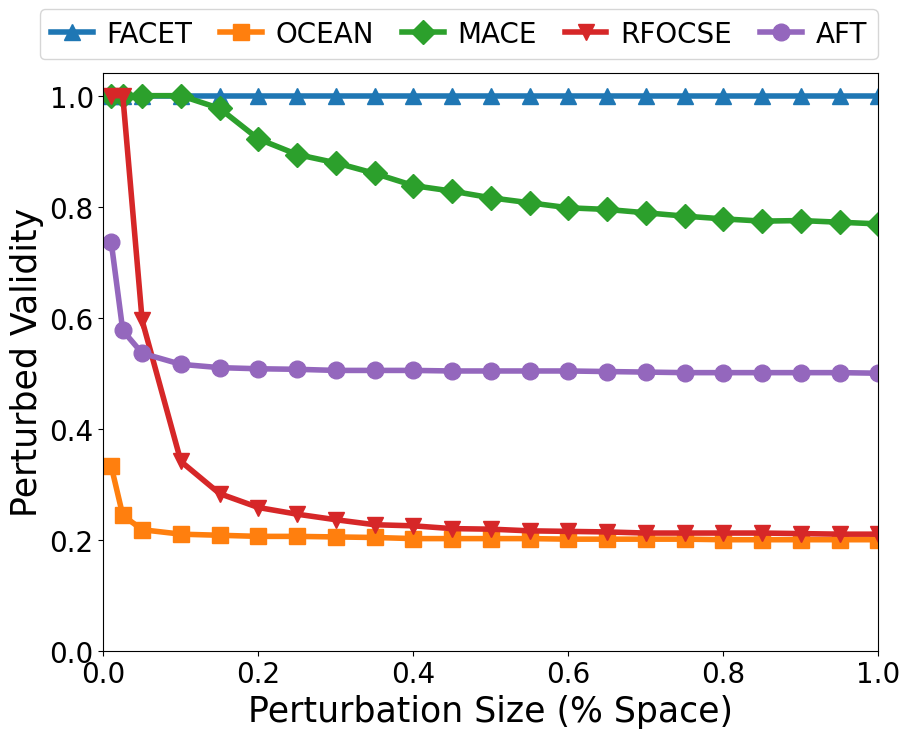

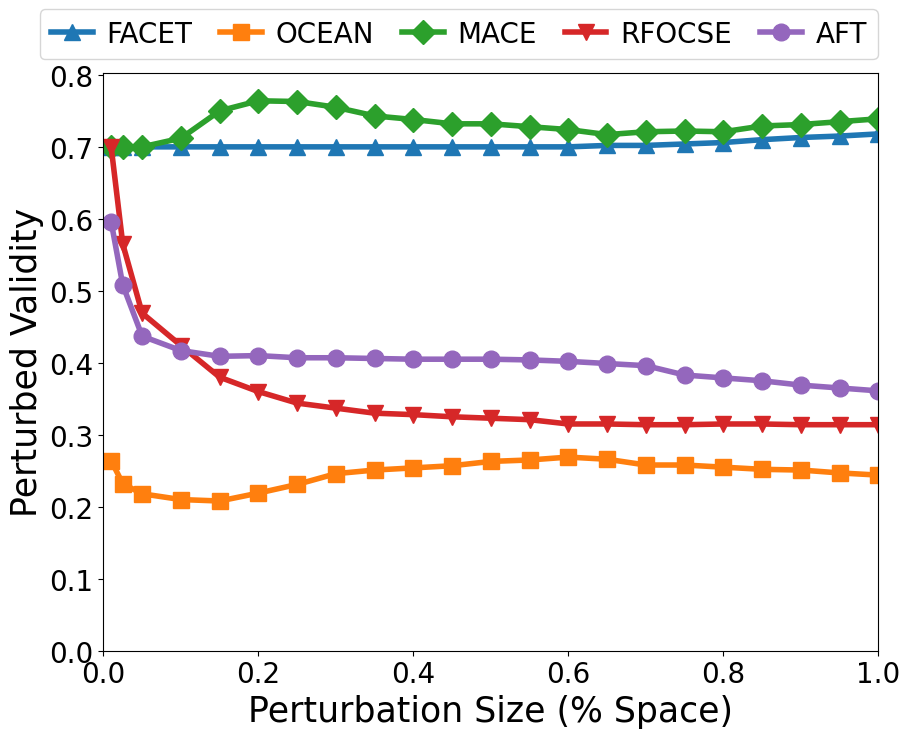

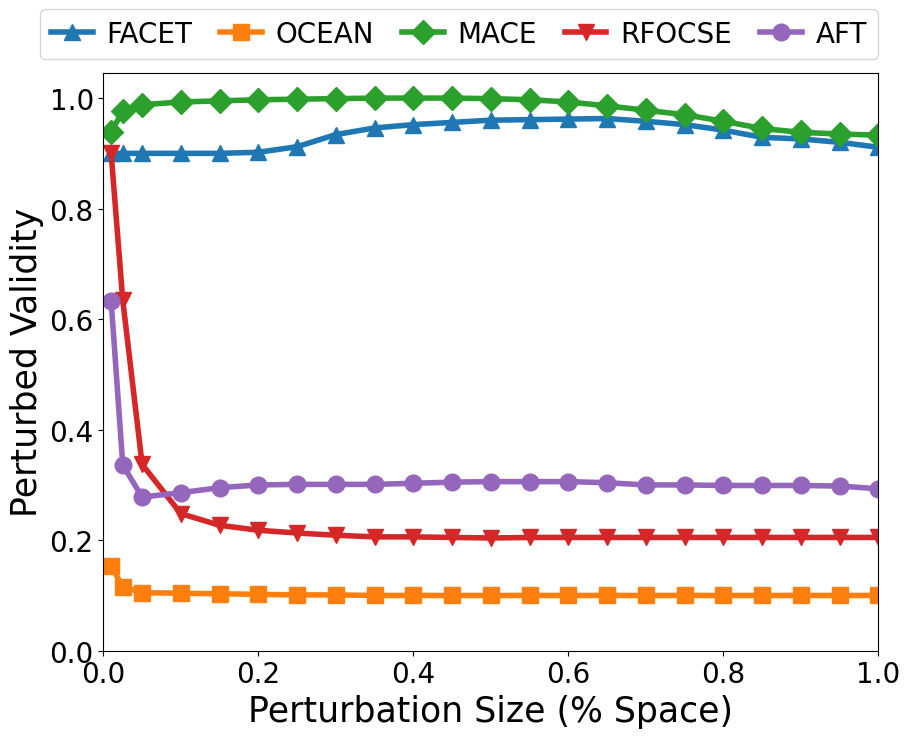

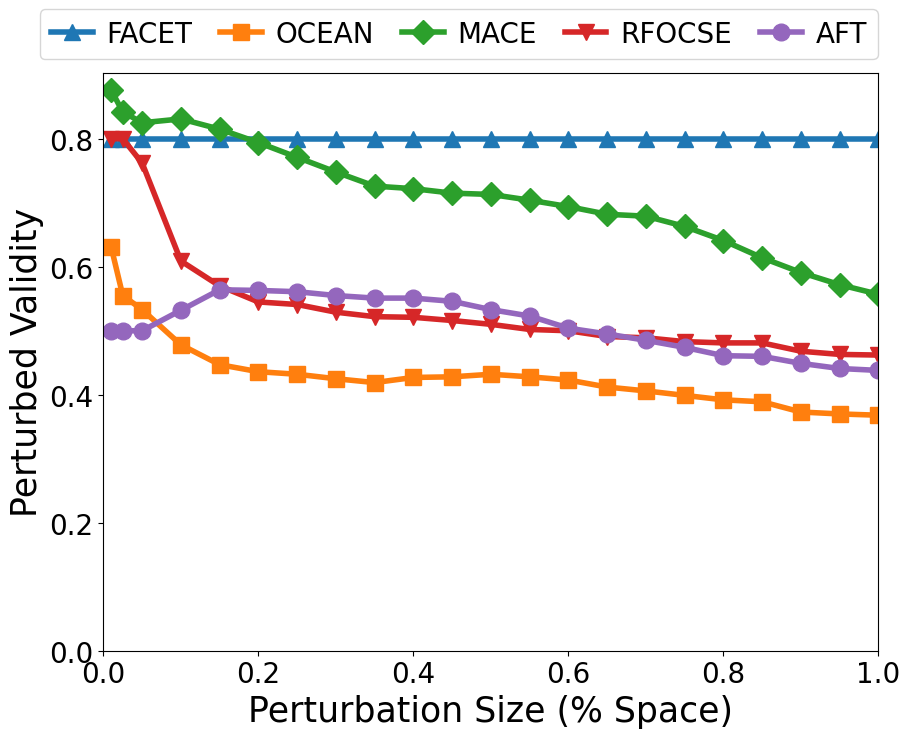

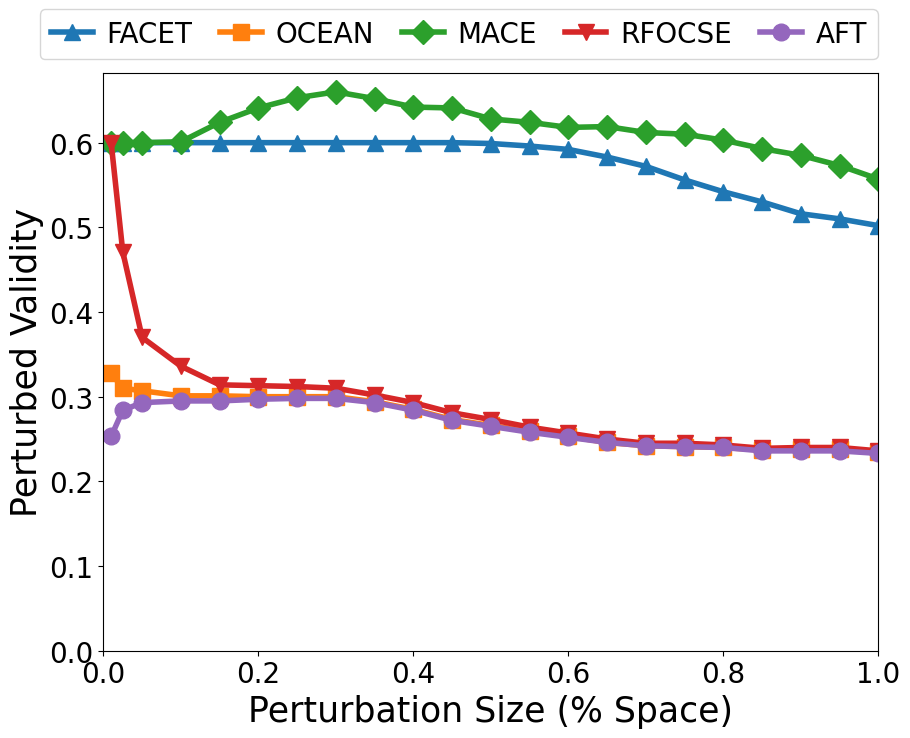

In [272]:
render_plot("perturbation_size", "per_valid", "Perturbation Size (% Space)", "Perturbed Validity", "Rate of Explanation Failure", save_name="perturbation_valid", xrange=[0, 1], yrange=[0, None])

In [ ]:
# def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False):

#     for ds in all_results["dataset"].unique():
#         # fig = plt.figure(figsize=[10, 4.8], frameon=True)
#         fig = plt.figure(figsize=[10, 7.5], frameon=True)
#         [6.4, 4.8]
#         is_ds = all_results["dataset"] == ds
#         for expl in explainers:
#             is_expl = all_results["explainer"] == expl
#             matching_rows = is_ds & is_expl
#             plt.plot(all_results[matching_rows][xfeature] * 100, all_results[matching_rows][yfeature], label=expl, marker=explainer_markers[expl], lw=line_width, ms=marker_sizes[expl])

#         plt.xlabel(xlabel, fontsize=25)
#         plt.ylabel(ylabel, fontsize=25)
#         if use_titles:
#             plt.title(ds, x=1.02, y=-0.21, fontsize=20, fontdict={"color": "lightgrey", "horizontalalignment": "right"})
        
#         if ylog:
#             plt.yscale('log')
#         if xrange is not None:
#             plt.xlim(xrange)
#         if yrange is not None:
#             if yrange[0] is not None:
#                 plt.ylim(bottom=yrange[0])
#             if yrange[1] is not None:
#                 plt.ylim(top=yrange[0])

#         plt.xticks(fontsize=20, rotation="horizontal")
#         plt.yticks(fontsize=20)

#         if use_legend:
#             expl_names = [pretty_explainer_names[_] for _ in explainers]
#             plt.legend(expl_names, ncol=len(explainers), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size":20}, bbox_to_anchor=(-0.1, 1, 0.8, 0),) # 

#         if export_figures and save_name is not None:
#             plt.savefig(output_dir + save_name + "_" + ds + fig_type, bbox_inches="tight")

In [176]:
i = 0
while i<=5e-4:
    i += 1e-5   
    print("{:0.5f}".format(i), end=" ")
while i<=5e-2:
    i += 5e-4
    print("{:0.5f}".format(i), end=" ")
while i<=5e-1:
    i += 5e-3
    print("{:0.5f}".format(i), end=" ")

0.00001 0.00002 0.00003 0.00004 0.00005 0.00006 0.00007 0.00008 0.00009 0.00010 0.00011 0.00012 0.00013 0.00014 0.00015 0.00016 0.00017 0.00018 0.00019 0.00020 0.00021 0.00022 0.00023 0.00024 0.00025 0.00026 0.00027 0.00028 0.00029 0.00030 0.00031 0.00032 0.00033 0.00034 0.00035 0.00036 0.00037 0.00038 0.00039 0.00040 0.00041 0.00042 0.00043 0.00044 0.00045 0.00046 0.00047 0.00048 0.00049 0.00050 0.00100 0.00150 0.00200 0.00250 0.00300 0.00350 0.00400 0.00450 0.00500 0.00550 0.00600 0.00650 0.00700 0.00750 0.00800 0.00850 0.00900 0.00950 0.01000 0.01050 0.01100 0.01150 0.01200 0.01250 0.01300 0.01350 0.01400 0.01450 0.01500 0.01550 0.01600 0.01650 0.01700 0.01750 0.01800 0.01850 0.01900 0.01950 0.02000 0.02050 0.02100 0.02150 0.02200 0.02250 0.02300 0.02350 0.02400 0.02450 0.02500 0.02550 0.02600 0.02650 0.02700 0.02750 0.02800 0.02850 0.02900 0.02950 0.03000 0.03050 0.03100 0.03150 0.03200 0.03250 0.03300 0.03350 0.03400 0.03450 0.03500 0.03550 0.03600 0.03650 0.03700 0.03750 0.03800 

In [177]:
# csv_check_path = "../results/perturbations-local/aft_spambase_perturbations.csv"
# df_csv = pd.read_csv(csv_check_path)
# df_csv.head()
# df_csv = df_csv.groupby(["iteration", "explainer", "dataset"]).min()
# idx_invalid = df_csv["per_valid"] == -1
# invalid_iterations = df_csv[idx_invalid]
# valid_iterations = df_csv[~idx_invalid]

In [178]:
# invalid_iterations.head(20)

In [179]:
# valid_iterations.head(20)